

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


In [2]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> For this part i only trying to understand the data and see the statistics 

### General Properties

In [3]:
# Reading the dataset file name:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#printing out a few lines:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Reading dataset general information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Checking the shape
df.shape

(110527, 14)

In [6]:
# Describing the numerical attributes:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Checking the duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

> Like we see here that there is no duplicate values


In [8]:
# Checking the null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> Like we see here that there is no missing value


> in this part i 'll make the data more useful for manipulate it and make a good story from it


### Data Cleaning

In [4]:
# i dropped this two columns because i don't need it 

df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head() 


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# in this part i'll transfert the columns from no-show to show to avoid any misunderstanding
df=df.rename(columns = {'No-show' : 'show'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df_show= df[df['show'] == 'No']
df_miss = df[df['show'] == 'Yes']


In [7]:
df_show= df_show.replace(['No'],'Yes')
df_miss= df_miss.replace(['Yes'],'No')


In [8]:
df=df_show.append(df_miss)
df.shape

C:\Users\mbouc\AppData\Local\Temp\ipykernel_17596\2637781478.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_show.append(df_miss)


(110527, 12)

In [9]:
# tranfert the AppointmentDay and ScheduledDay to date time format
df.AppointmentDay= df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay= df.ScheduledDay.apply(np.datetime64)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


Transfering AppointmentDay and ScheduledDay to date time 

In [10]:
# seperate ScheduledDay into two parts the date and the time after that delete it
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['ScheduledTime'] = pd.to_datetime(df['ScheduledDay']).dt.time
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDate,ScheduledTime
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23


In [11]:
df.drop('ScheduledDay', axis=1 , inplace=True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDate,ScheduledTime
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23


In [12]:
df.ScheduledDate= df.ScheduledDate.apply(np.datetime64)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDate,ScheduledTime
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110516
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   AppointmentDay  110527 non-null  datetime64[ns]
 2   Age             110527 non-null  int64         
 3   Neighbourhood   110527 non-null  object        
 4   Scholarship     110527 non-null  int64         
 5   Hipertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handcap         110527 non-null  int64         
 9   SMS_received    110527 non-null  int64         
 10  show            110527 non-null  object        
 11  ScheduledDate   110527 non-null  datetime64[ns]
 12  ScheduledTime   110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 11.8+ MB


In [13]:
# see the time between AppointmentDay and ScheduledDate
df['handling_time'] = df['AppointmentDay'] - df['ScheduledDate']
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDate,ScheduledTime,handling_time
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08,0 days
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27,0 days
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04,0 days
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31,0 days
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23,0 days


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110516
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   Gender          110527 non-null  object         
 1   AppointmentDay  110527 non-null  datetime64[ns] 
 2   Age             110527 non-null  int64          
 3   Neighbourhood   110527 non-null  object         
 4   Scholarship     110527 non-null  int64          
 5   Hipertension    110527 non-null  int64          
 6   Diabetes        110527 non-null  int64          
 7   Alcoholism      110527 non-null  int64          
 8   Handcap         110527 non-null  int64          
 9   SMS_received    110527 non-null  int64          
 10  show            110527 non-null  object         
 11  ScheduledDate   110527 non-null  datetime64[ns] 
 12  ScheduledTime   110527 non-null  object         
 13  handling_time   110527 non-null  timedelta64[ns]
dtypes: datetime64[ns](2)

In [14]:
df['handling_time'] = df['handling_time'].dt.days


In [24]:
#chaking the unique value
print('Age:',sorted(df.Age.unique()))
print('handling_time:',sorted(df.handling_time.unique()))
print('Neighbourhood:',sorted(df.Neighbourhood.unique()))
print('Scholarship:',sorted(df.Scholarship.unique()))
print('Hipertension:',sorted(df.Hipertension.unique()))
print('Diabetes:',sorted(df.Diabetes.unique()))
print('Alcoholism:',sorted(df.Alcoholism.unique()))
print('Handcap:',sorted(df.Handcap.unique()))
print('SMS_received:',sorted(df.SMS_received.unique()))


Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
handling_time: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]
Neighbourhood: ['AEROPORT

In [15]:
# delete negative value from age and time
df=df[(df.Age >= 0) &  (df.handling_time >= 0)]


## Data cleaning summary

we didn't find any missing or duplicate values 

what we did in the cleaning section:

- we dropped two columns 'PatientId' and 'AppointmentID'
- rename the no show column to show and change values to avoid misunderstanding
- Transfering AppointmentDay and ScheduledDay to date time 
- seperate ScheduledDay into two parts the date and the time after that delete it
- tranfert ScheduledDate to date time format
- make new column to see the waiting time between AppointmentDay and ScheduledDate
- drop values with age and handling time < 0


<a id='eda'></a>
## Exploratory Data Analysis

Now we are going to plot the data to get the answers

what are the influencing factors with negative and positive effect

In [38]:
# see count for every value 
print(df.Gender.value_counts())
print(df.Neighbourhood.value_counts())
print(df.Neighbourhood.value_counts())
print(df.Hipertension.value_counts())
print(df.Diabetes.value_counts())
print(df.Alcoholism.value_counts())
print(df.Handcap.value_counts())
print(df.SMS_received.value_counts())

F    71836
M    38685
Name: Gender, dtype: int64
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64
0    88720
1    21801
Name: Hipertension, dtype: int64
0    102578


In [16]:
show = df.show == 'Yes'
miss = df.show == 'No'

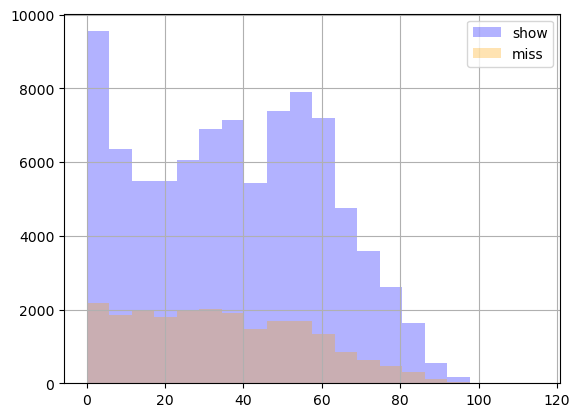

In [17]:
# plot histogram 
df.Age[show].hist(alpha=0.3, bins=20, color='blue', label='show');
df.Age[miss].hist(alpha=0.3, bins=20,color= 'orange', label='miss');
plt.legend();

like we see the number of showing patinet is much higher than the oppisite.

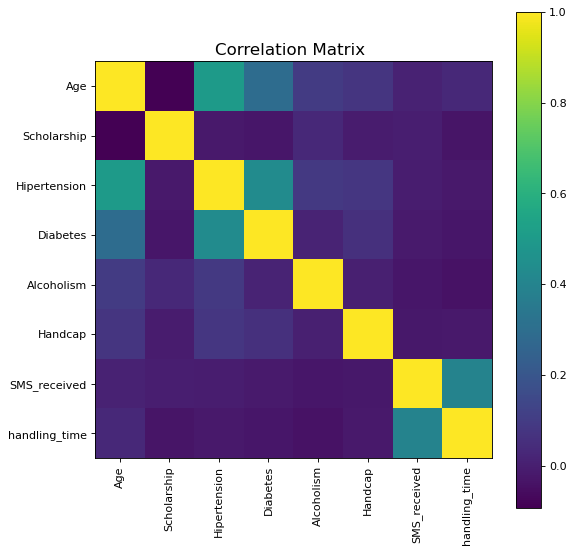

In [82]:
# plotting the correlation between the variables to see the relationship between each other
corr = df.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='r')
corrMat = plt.matshow(corr, fignum =1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=10)
plt.title(f'Correlation Matrix ', fontsize=15)
plt.show()

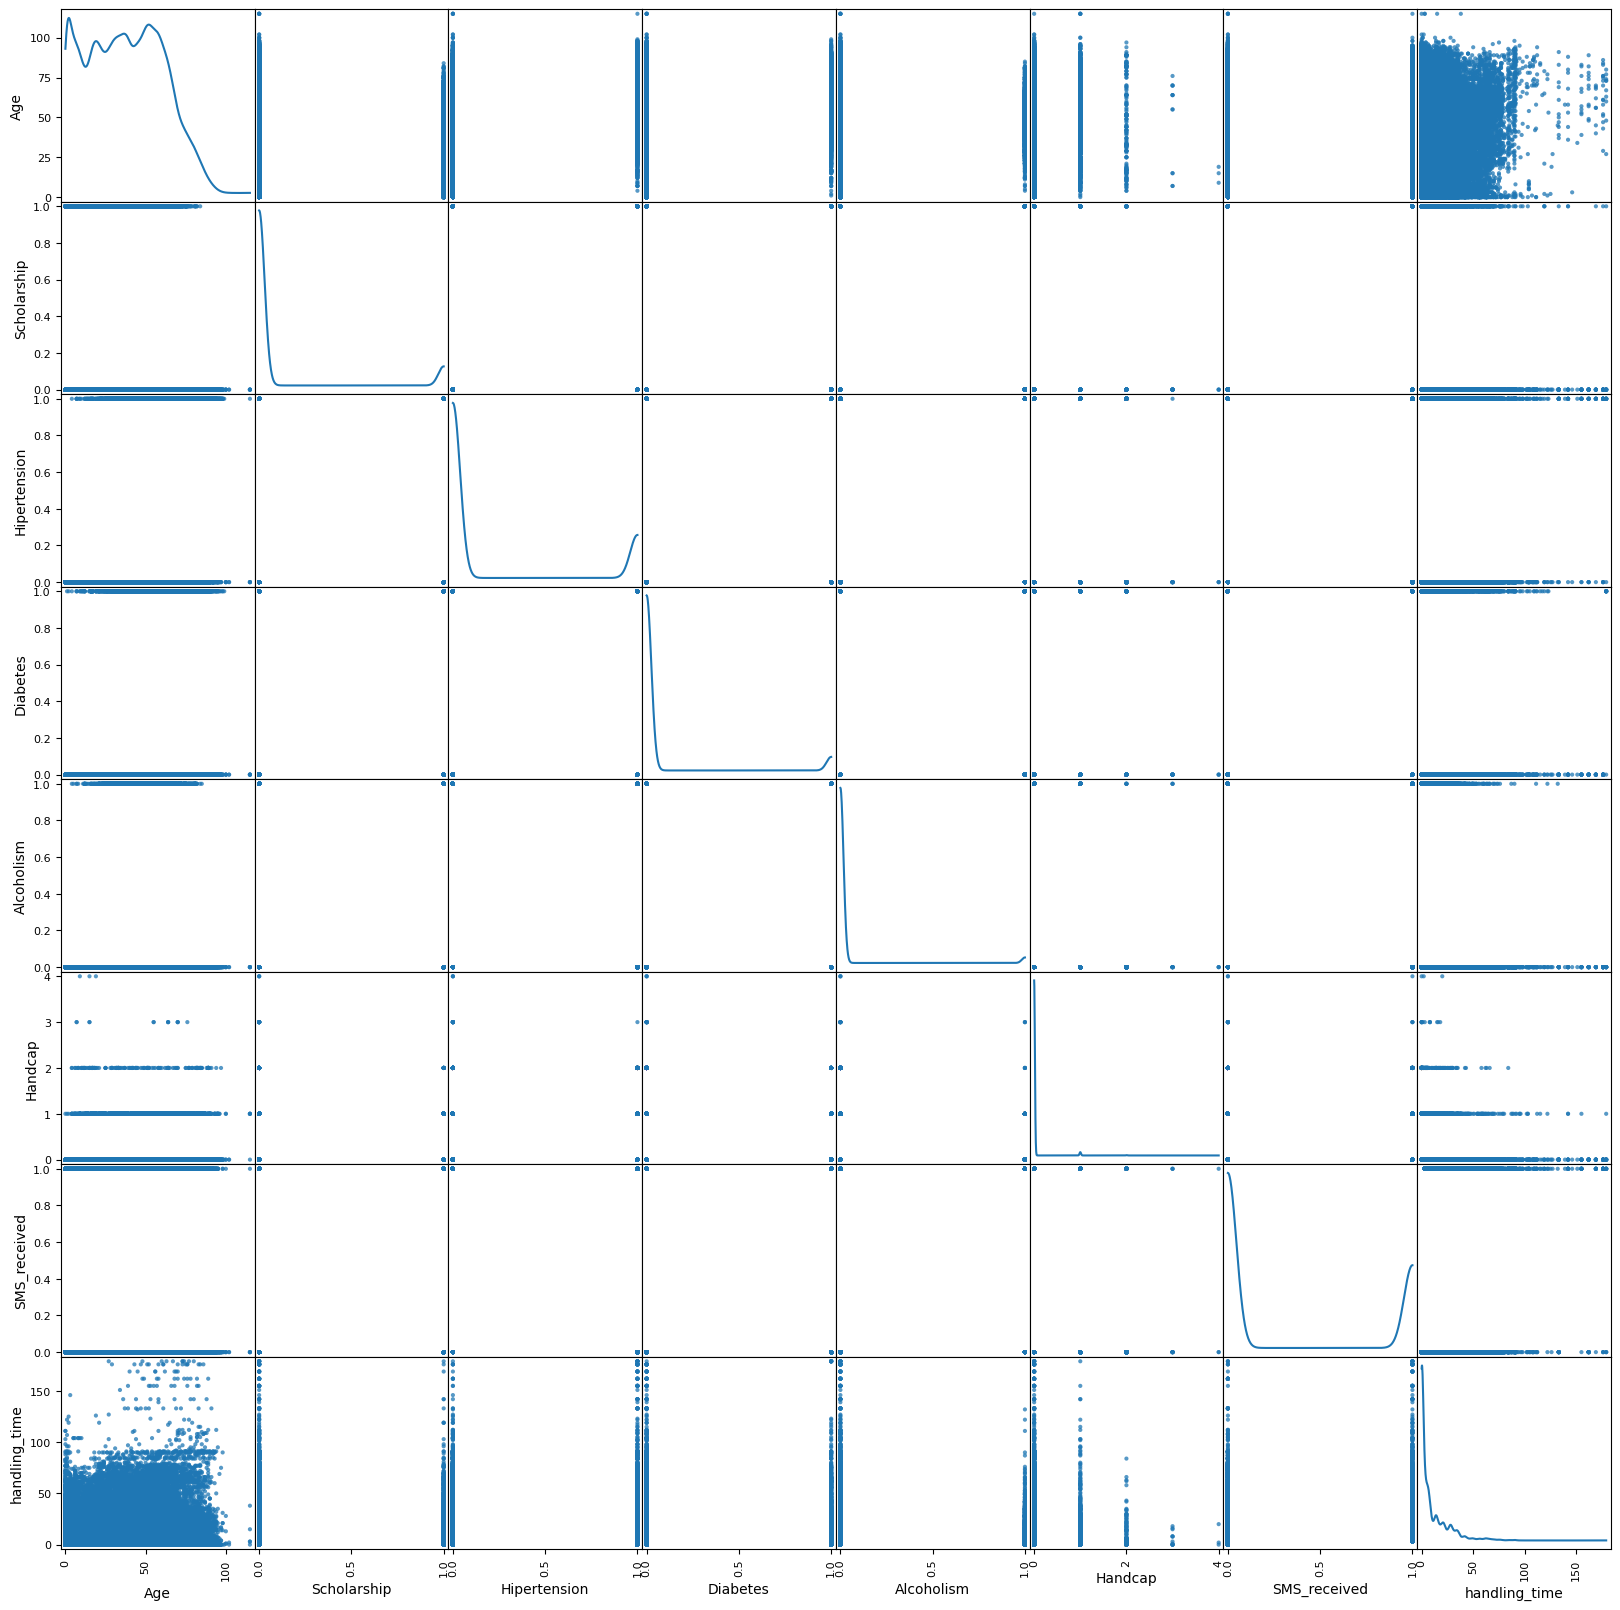

In [57]:
#relationship betwwen variables
pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[20, 20], diagonal='kde');

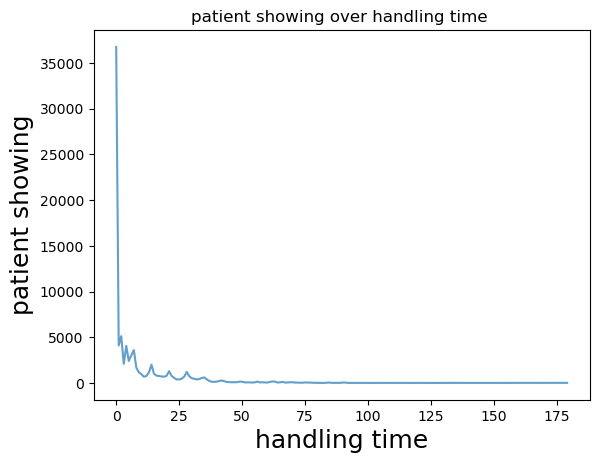

In [71]:
df_yes = df.query('show == "Yes"')
df_yes.groupby('handling_time')['show'].count().plot(kind='line', title='patient showing over handling time ', alpha=.7);
plt.xlabel('handling time', fontsize=18)
plt.ylabel('patient showing', fontsize=18);

like we see here when the handling time eqaul 1 the number of showing patient decreases dramatically. and slighlty decreases until showing patient become 0

In [75]:
def prob(group_by):
    rows = [{'Case': item, 'VAR': level, 'Probability': len(df[(df[item] == level) & (df.show == 'Yes')]) / len(df[df[item] == level])}
            for item in group_by for level in df[item].unique()]
    return pd.DataFrame(rows)

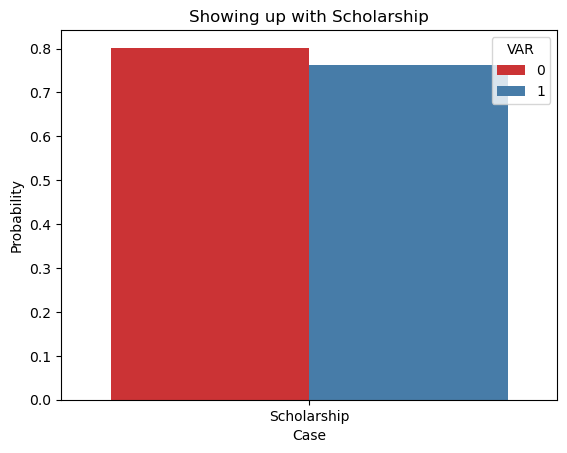

In [76]:
# plotting probability of showing up for Scholarship 
sns.barplot(data = prob(['Scholarship' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with Scholarship')
plt.ylabel('Probability')
plt.show()

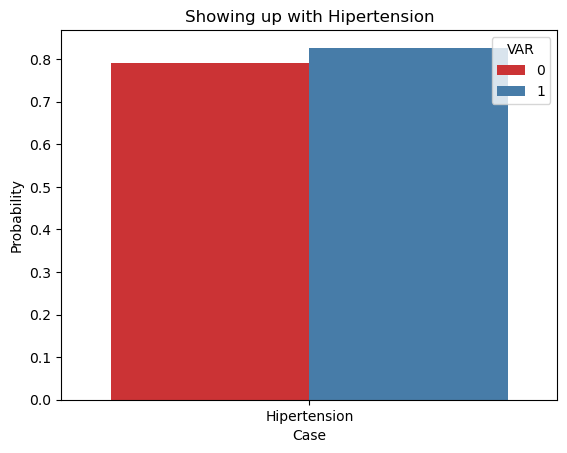

In [77]:
# plotting probability of showing up for Hipertension 
sns.barplot(data = prob([ 'Hipertension' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with Hipertension')
plt.ylabel('Probability')
plt.show()

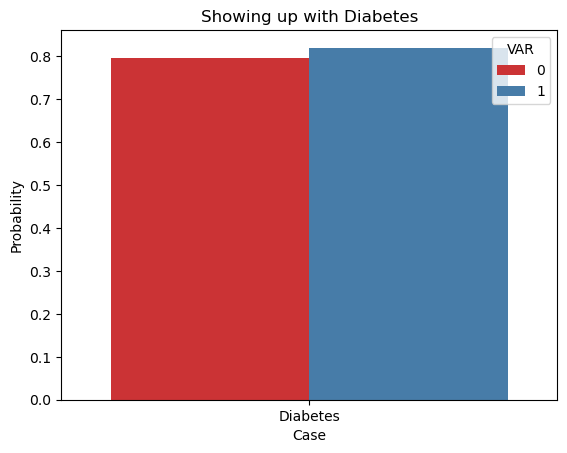

In [78]:
# plotting probability of showing up for Diabetes 
sns.barplot(data = prob([ 'Diabetes' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with Diabetes')
plt.ylabel('Probability')
plt.show()

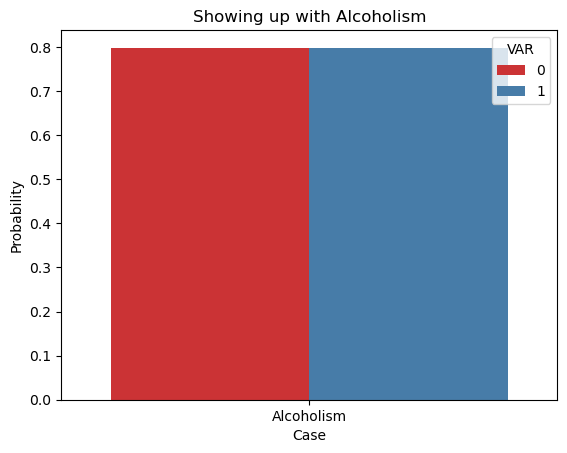

In [79]:
# plotting probability of showing up for Alcoholism 
sns.barplot(data = prob(['Alcoholism' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with Alcoholism')
plt.ylabel('Probability')
plt.show()

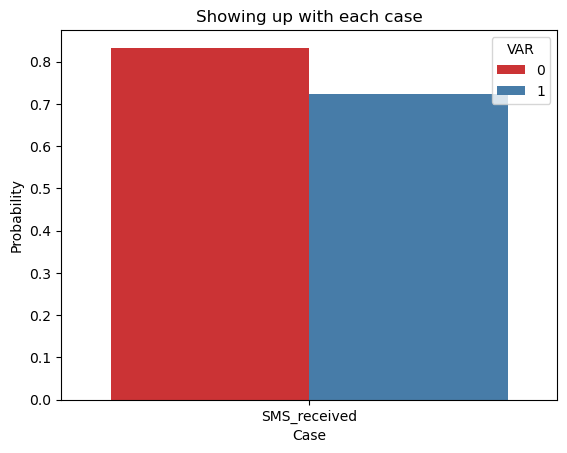

In [45]:
# plotting probability of showing up for SMS_received 
sns.barplot(data = prob(['SMS_received' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with SMS received')
plt.ylabel('Probability')
plt.show()

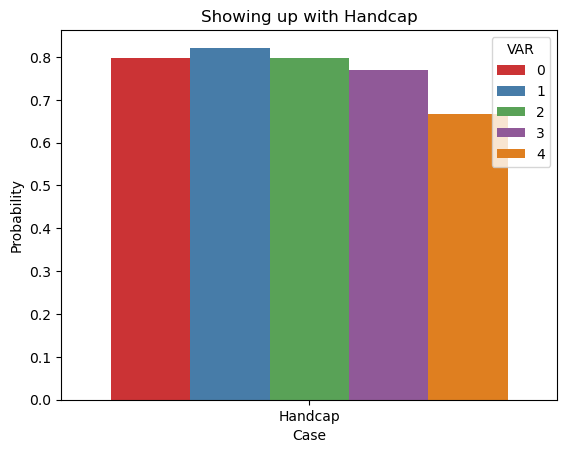

In [80]:
# plotting probability of showing up for Handcap
sns.barplot(data = prob(['Handcap' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with Handcap')
plt.ylabel('Probability')
plt.show()

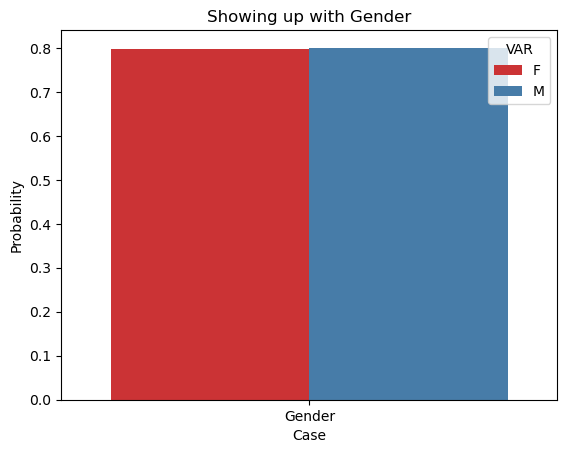

In [81]:
# plotting probability of showing up for Gender
sns.barplot(data = prob([ 'Gender' ]),x = 'Case', y = 'Probability', hue = 'VAR', palette = 'Set1')
plt.title('Showing up with Gender')
plt.ylabel('Probability')
plt.show()

<a id='conclusions'></a>
## Conclusions

> we can see that gender and alcoholism have no effect on the probability of showing up, on the other hand SMS receiving and scholarship have positive effect on the probability of showing up ( when someone got SMS or scholarship the probability goes up)
Hipertension and alcoholism have negative effect on the probability. the level 1 of handicap is the most influencer on the probability of showing up.

> most of patient showing are the ones who had the same  Scheduled Day 	with Appointment Day
